# 컨텐츠 기반 추천서비스

추출된 feature 바탕으로 추천 가즈아

**Nearest Neighbor 기반 협업 필터링** https://medium.com/sfu-cspmp/recommendation-systems-user-based-collaborative-filtering-using-n-nearest-neighbors-bf7361dc24e0

**SVDPP 기반 추천시스템?** https://blog.cambridgespark.com/tutorial-practical-introduction-to-recommender-systems-dbe22848392b

**추천 시스템의 설계 (PR시리즈.18)** https://bahnsville.tistory.com/936

**딥러닝을 이용한 자연어처리 - 여러가지 유사도기법들** https://wikidocs.net/24654

**토닥토닥 파이썬 - Pearson 유사도 기반 협업필터링** https://wikidocs.net/44421

**딥러닝 이용 의류 세트 추천** https://www.slideshare.net/MinjiKang31/ppt-79412896  
InceptionV3 feature 추출 -> Attribute Matrix 기반 추천


## 이미지 데이터 기반 추천

### 데이터 불러오기

In [1]:
import os

os.chdir('..')

In [2]:
import pickle

In [4]:
%time
#feature 저장된 dict 불러오기
#pickle을 load하는데는 시간이 얼마 안 걸림
with open('prep_data/train_feature.pickle', 'rb') as handle:
    train_dict = pickle.load(handle)

Wall time: 0 ns


In [ ]:
%time
#pickle로 불러와진 dict를 stdout으로 display하는데는 굉장히 오래 걸림
#약 20초?
train_dict

In [8]:
%time
with open('prep_data/test_feature.pickle', 'rb') as handle:
    test_dict = pickle.load(handle)

Wall time: 0 ns


### 단순 유사도계산

코사인 유사도

In [4]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

def cos_sim(A, B):
    A = A.flatten()
    B = B.flatten()
    return dot(A, B)/(norm(A)*norm(B))

In [9]:
import itertools

cos_dict = {}
for key1,key2 in itertools.combinations(train_dict, 2) :
    cos_dict[(key1,key2)] = cos_sim(train_dict[key1],train_dict[key2])
#cos_sim

In [ ]:
cos_dict

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from keras.preprocessing import image

#이미지 표시 함수
def show_image(img_no1,img_no2) :
    img1 = image.load_img("data/fashion-dataset/images/{}.jpg".format(img_no1), target_size=(224, 224))
    img2 = image.load_img("data/fashion-dataset/images/{}.jpg".format(img_no2), target_size=(224, 224))
    #이미지 확인
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    plt.show()

In [ ]:
show_image(1163,1164)

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0., 353220.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.]),
 array([0.5000001 , 0.5200001 , 0.54000014, 0.5600001 , 0.5800001 ,
        0.60000014, 0.6200001 , 0.6400001 , 0.66000015, 0.6800001 ,
        0.7000001 , 0.72000015, 0.7400001 , 0.7600001 , 0.7800001 ,
        0.80000013, 0.8200001 , 0.8400001 , 0.86000013, 0.8800001 ,
        0.9000001 , 0.92000014, 0.9400001 , 0.9600001 , 0.98000014,
        1.0000001 , 1.0200001 , 1.0400001 , 1.0600001 , 1.0800002 ,
        1.1000001 , 1.1200001 , 1.1400001 , 1.1600001 , 1.1800001 ,
        

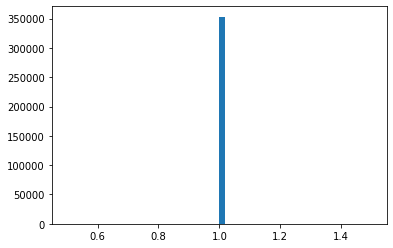

In [11]:
#코사인 유사도 결과 hist
plt.hist(cos_dict.values(),bins=50)

In [77]:
#코사인 유사도가 0.5이상인 녀석들만 모아보기
pairs = []
for key,value in cos_dict.items() :
    if value >0.5 :
        pairs.append(key)

In [ ]:
for pair in pairs :
    show_image(pair[0],pair[1])

In [89]:
#코사인 유사도가  0.5미만인  녀석들만 모아보기
pairs = []
for key,value in cos_dict.items() :
    if value <0.5 :
        pairs.append(key)

In [ ]:
for pair in pairs :
    show_image(pair[0],pair[1])

피어슨 상관계수